In [1]:
import yt
import numpy as np

/home/ThirdEye87/.local/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/ThirdEye87/.config/yt/ytrc is deprecated in favor of /home/ThirdEye87/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [8]:
plot_num = 10
diag_num = 0
plot_num += 1000000
diag_num += 1000000
plot_num_list = list(str(plot_num))
diag_num_list = list(str(diag_num))
plot_num_list[0] = '0'
diag_num_list[0] = '0'
plotname = "plt"+"".join(plot_num_list)
diagname = "diag"+"".join(diag_num_list)

In [9]:
dplot = yt.load(plotname)
ddiag = yt.load(diagname)

/home/ThirdEye87/.local/lib/python3.8/site-packages/yt/sample_data/api.py:138: UserWarning: Storage directory from yt config doesn't exist (currently set to '/does/not/exist'). Current working directory will be used instead.
  warn(


FileNotFoundError: No such file or directory: 'plt0000010'.
(Also tried '/home/ThirdEye87/ET-Integration/Exec/InitialDataSolver/plt0000010').

In [10]:
print(dplot.field_list)
print(ddiag.field_list)

[('boxlib', 'Atilde_LL_00'), ('boxlib', 'Atilde_LL_01'), ('boxlib', 'Atilde_LL_02'), ('boxlib', 'Atilde_LL_11'), ('boxlib', 'Atilde_LL_12'), ('boxlib', 'Atilde_LL_22'), ('boxlib', 'alphafunc'), ('boxlib', 'betafunc'), ('boxlib', 'chi'), ('boxlib', 'psi'), ('boxlib', 'u')]


NameError: name 'ddiag' is not defined

In [11]:
#sc = yt.create_scene(dplot,('boxlib', 'u'))
#tf = sc.get_source().transfer_function
#tf.clear()
#tf.add_layers(10)
#sc.annotate_domain(dplot, color=[1,1,1,0.1])
#cam = sc.camera
#cam.zoom(5)
#sc.show()

yt : [INFO     ] 2022-08-17 09:48:29,710 xlim = -512.000000 512.000000
yt : [INFO     ] 2022-08-17 09:48:29,711 ylim = -512.000000 512.000000
yt : [INFO     ] 2022-08-17 09:48:29,711 xlim = -512.000000 512.000000
yt : [INFO     ] 2022-08-17 09:48:29,712 ylim = -512.000000 512.000000
yt : [INFO     ] 2022-08-17 09:48:29,713 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800



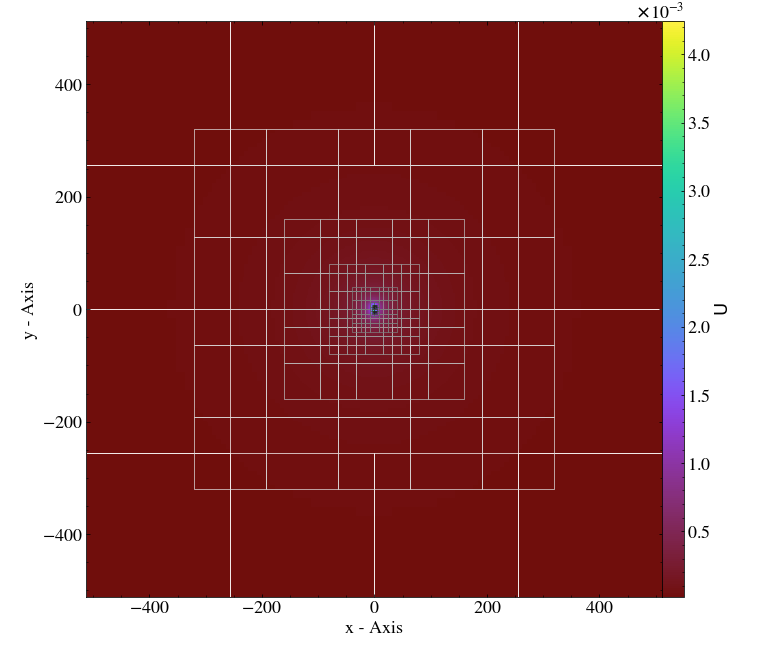

NameError: name 'ddiag' is not defined

In [13]:
var = 'u'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native')
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
s.annotate_grids()
s.zoom(1)
s.show()

var = 'alpha'
s = yt.SlicePlot(ddiag, 'z', ('boxlib', var), origin='native')
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
#s.annotate_grids()
s.zoom(1)
s.show()

yt : [INFO     ] 2020-05-06 13:55:18,089 xlim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,089 ylim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,092 xlim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,092 ylim = -75.000000 75.000000
yt : [INFO     ] 2020-05-06 13:55:18,094 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800
yt : [INFO     ] 2020-05-06 13:55:18,187 Making a fixed resolution buffer of (('boxlib', 'u')) 800 by 800



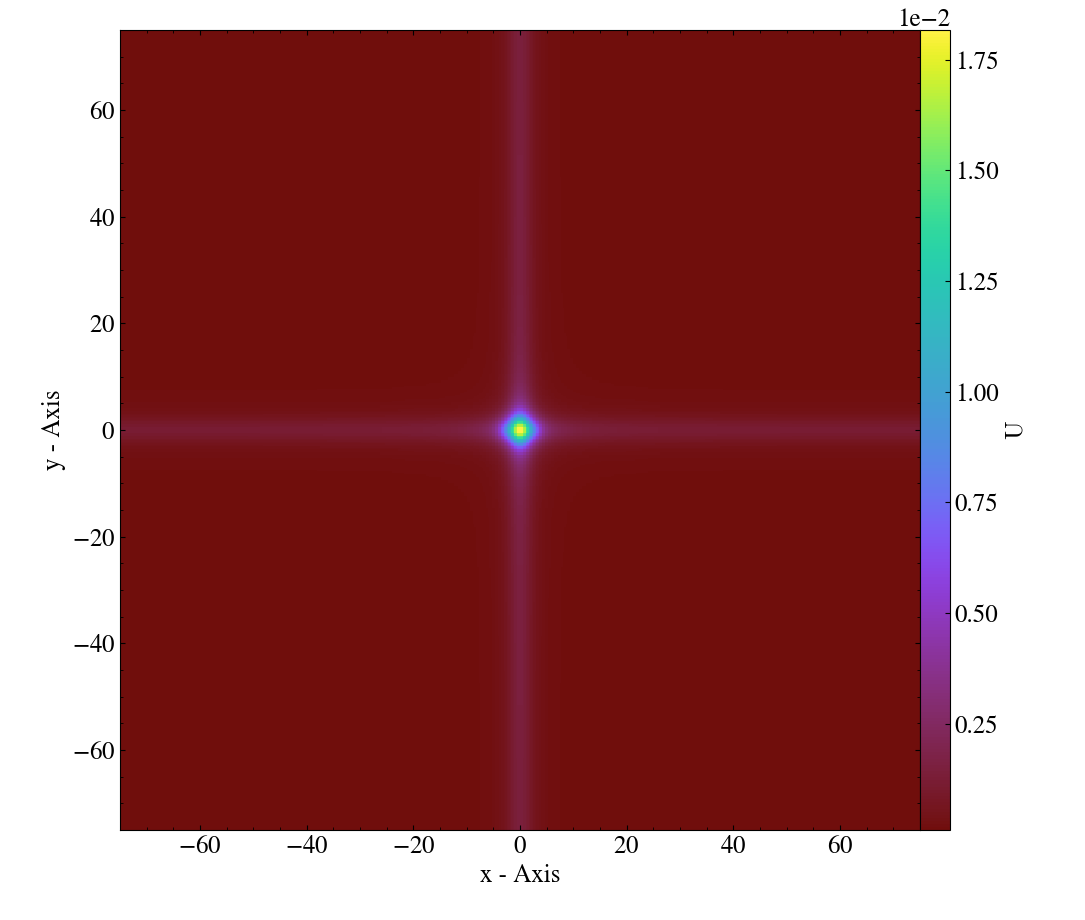

In [31]:
var = 'u'
s = yt.SlicePlot(ds, 'z', ('boxlib', var), origin='native')
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
s.zoom(1)
s.show()

In [68]:
s.save("phi_t400.pdf")

yt : [INFO     ] 2020-05-05 15:32:40,763 Saving plot phi_t400.pdf


['phi_t400.pdf']

In [ ]:
var = 'phi'
for i in range(301):
    ident = list(str(int(5*i)+10000))
    ident[0] = '0'
    filename = "plt00"+"".join(ident)
    ds = yt.load(filename)
    s = yt.SlicePlot(ds, 'z', ('boxlib', var), origin='native', center = [0,0,0])
    s.set_log(('boxlib', var), False)
    s.set_xlabel('x - Axis')
    s.set_ylabel('y - Axis')
    s.hide_colorbar()
    #s.annotate_cell_edges()
    s.zoom(2)
    
    ident2 = list(str(i+10000))
    ident2[0] = '0'
    s.save("img"+"".join(ident2)+".png")

In [76]:
cg = ds.covering_grid(left_edge=ds.domain_left_edge, dims=ds.domain_dimensions, level=0)
coords = cg.fcoords

xs = coords[:,0]
ys = coords[:,1]
zs = coords[:,2]

dx = np.max(xs[1:] - xs[:-1])
dy = np.max(ys[1:] - ys[:-1])
dz = np.max(zs[1:] - zs[:-1])

H = cg["u"][:,:,:].d

In [77]:
H[64, 64, 64]

0.0081254919985896176

In [49]:
H[64, 64, 64]

1.2775443176769271e-10

In [49]:
H[0, 0, 0]

0.0010225271343679068